# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

In [22]:
cities

['sarkand',
 'vorgashor',
 'blackmans bay',
 'anadyr',
 'adamstown',
 'dunedin',
 'port-aux-francais',
 'port elizabeth',
 'bikenibeu village',
 'kilindoni',
 'invercargill',
 "st. john's",
 'stephenville',
 'ilhabela',
 'bogande',
 'punta arenas',
 'aykhal',
 'thompson',
 'atafu village',
 'callao',
 'hithadhoo',
 'sikeston',
 'petropavlovsk-kamchatsky',
 'taiohae',
 'san mateo ixtatan',
 'iskateley',
 'stanley',
 'waitangi',
 'margaret river',
 'chui',
 'bilibino',
 'klyuchi',
 'iqaluit',
 'bredasdorp',
 "dul'durga",
 'souillac',
 'port mathurin',
 'puerto san carlos',
 'constantia',
 'albany',
 "mil'kovo",
 'mount pearl',
 'puerto natales',
 'port lincoln',
 'pangody',
 'pacific grove',
 'wacheng',
 'santa isabel',
 'oodweyne',
 'oum hadjer',
 'yellowknife',
 'grytviken',
 'lamu',
 'isafjordur',
 'horta',
 'whitehorse',
 'ushuaia',
 'colonia',
 'takoradi',
 'qaqortoq',
 'tiksi',
 'sambava',
 'rikaze',
 'jayapura',
 'vilyuchinsk',
 'lawton',
 'codrington',
 'cidreira',
 'las terrenas

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sarkand
City not found. Skipping...
Processing Record 2 of Set 1 | vorgashor
City not found. Skipping...
Processing Record 3 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 4 of Set 1 | anadyr
City not found. Skipping...
Processing Record 5 of Set 1 | adamstown
City not found. Skipping...
Processing Record 6 of Set 1 | dunedin
City not found. Skipping...
Processing Record 7 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 8 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 9 of Set 1 | bikenibeu village
City not found. Skipping...
Processing Record 10 of Set 1 | kilindoni
City not found. Skipping...
Processing Record 11 of Set 1 | invercargill
City not found. Skipping...
Processing Record 12 of Set 1 | st. john's
City not found. Skipping...
Processing Record 13 of Set 1 | stephenville
City not found. Skipping...
Processing Rec

In [24]:
rows = []

# loop cities
for city in cities[0:30]:
    
    try:

        # geolocation
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
        response = requests.get(geo_url)

        if (response.status_code == 200):
            # do work
            geo_data = response.json()

            # get lat, lon, country, name
            if len(geo_data) > 0:
                lat = geo_data[0].get("lat", np.nan)
                lon = geo_data[0].get("lon", np.nan)
                country = geo_data[0].get("country", None)
                name = geo_data[0].get("name", None)

        #         print(f"{city} is located at {lat},{lon}")

                if (lat and lon):
                    # weather
                    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"
                    response2 = requests.get(weather_url)

                    if (response2.status_code == 200):
                        weather_data = response2.json()

                        # extract data
                        temp = weather_data.get("main", {}).get("temp", np.nan)
                        pressure = weather_data.get("main", {}).get("pressure", np.nan)
                        humidity = weather_data.get("main", {}).get("humidity", np.nan)
                        wind_speed = weather_data.get("wind", {}).get("speed", np.nan)
                        cloudiness = weather_data.get("clouds", {}).get("all", np.nan)
                        date = wind_speed = weather_data.get("dt", np.nan)

                        # build row
                        row = {"city": name,
                               "country": country,
                               "latitude": lat,
                               "longitude": lon,
                               "temperature": temp,
                               "pressure": pressure,
                               "humidity": humidity,
                               "wind_speed": wind_speed,
                              "cloudiness": cloudiness,
                              "date": date}

            #             print(row)
                        rows.append(row)

                    else:
                        print(f"Getting Weather Data failed with status code: {response2.status_code}. More info below:")
                        print(weather_data)
                else:
                    print("failed to extract lat and lon from response")
                    print(geo_data)
            else:
                print(f"did not find any geolocation data for city: {city}")
        else:
            print(f"Getting geolocation data failed with status code: {response.status_code}. More info below:")
            print(geo_data)
    except Exception as e:
        print(f"Something went terribly wrong for {city}")
        print(e)
    
    # sleep 
    print(f"{city} was processed successfully.")
    time.sleep(1)

sarkand was processed successfully.
vorgashor was processed successfully.
blackmans bay was processed successfully.
anadyr was processed successfully.
adamstown was processed successfully.
dunedin was processed successfully.
port-aux-francais was processed successfully.
port elizabeth was processed successfully.
did not find any geolocation data for city: bikenibeu village
bikenibeu village was processed successfully.
kilindoni was processed successfully.
invercargill was processed successfully.
st. john's was processed successfully.
stephenville was processed successfully.
ilhabela was processed successfully.
bogande was processed successfully.
punta arenas was processed successfully.
aykhal was processed successfully.
thompson was processed successfully.
did not find any geolocation data for city: atafu village
atafu village was processed successfully.
callao was processed successfully.
hithadhoo was processed successfully.
sikeston was processed successfully.
petropavlovsk-kamchatsk

In [25]:
df = pd.DataFrame(rows)

In [26]:
# Convert the cities weather data into a Pandas DataFrame
df = pd.DataFrame(rows)

# Show Record Count
df.count()

city           28
country        28
latitude       28
longitude      28
temperature    28
pressure       28
humidity       28
wind_speed     28
cloudiness     28
date           28
dtype: int64

In [27]:
# Display sample data
df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Sarkand,KZ,45.410923,79.915516,63.66,1011,50,1684010684,99,1684010684
1,Vorga-Shor,RU,67.581192,63.783737,11.53,1021,94,1684010686,90,1684010686
2,Blackmans Bay,AU,-43.004684,147.317986,39.45,1024,93,1684010687,65,1684010687
3,Anadyr,RU,64.731688,177.506092,31.37,996,93,1684010689,75,1684010689
4,Adamstown,PN,-25.066667,-130.100205,73.08,1019,69,1684010690,100,1684010690


In [28]:
# Export the City_Data into a csv
df = df.to_csv("cities.csv")

In [29]:
# Read saved data
df2 = pd.read_csv("Downloads/cities.csv")

# Display sample data
df2.head()

,Unnamed: 0,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,0,Anshun,CN,26.254911,105.943777,58.73,1014,78,1684007905,100,1684007905
1,1,Grytviken,GS,-54.280648,-36.509800,31.91,1005,84,1684007906,100,1684007906
2,2,El Calafate,AR,-50.338871,-72.272084,41.36,999,80,1684007908,13,1684007908
3,3,Papatowai,NZ,-46.561868,169.470842,45.63,1020,92,1684007909,99,1684007909
4,4,Rio de Janeiro,BR,-22.911014,-43.209373,71.55,1017,70,1684007847,40,1684007847


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

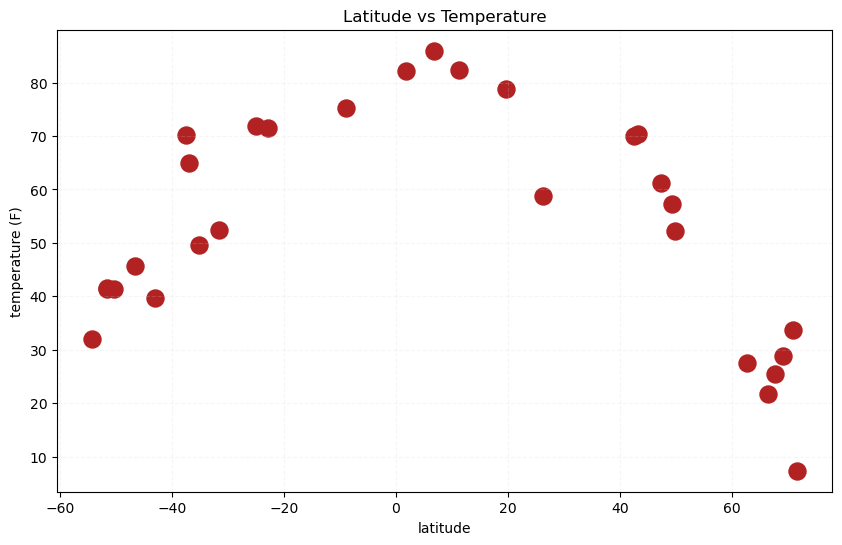

In [30]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
#plt.show()
plt.figure(figsize=(10,6))

plt.scatter(df2.latitude, df2.temperature, color="firebrick", s=150)
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.title("Latitude vs Temperature")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

#### Latitude Vs. Humidity

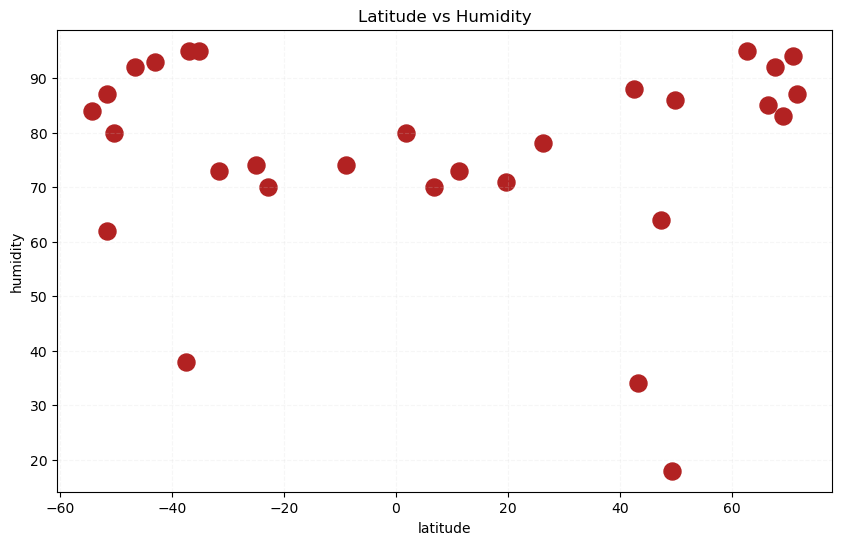

In [31]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.figure(figsize=(10,6))

plt.scatter(df2.latitude, df2.humidity, color="firebrick", s=150)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Humidity")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

#### Latitude Vs. Cloudiness

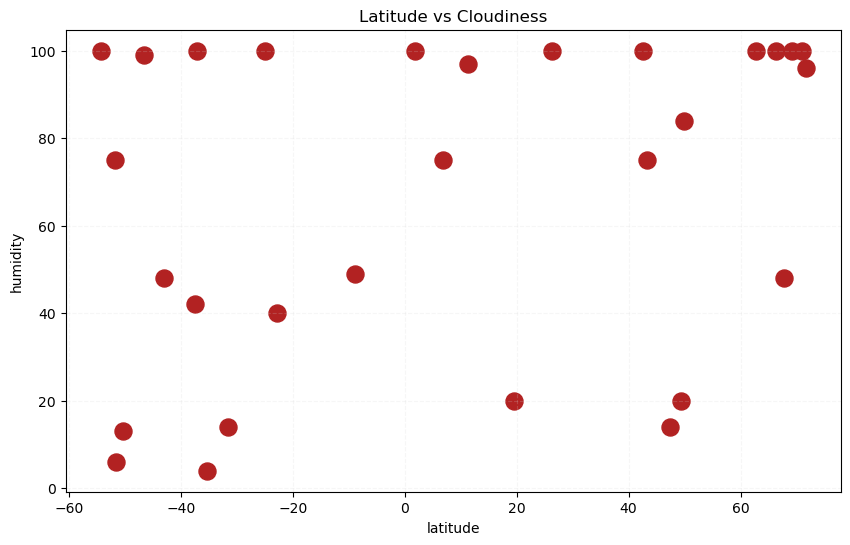

In [32]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.figure(figsize=(10,6))

plt.scatter(df2.latitude, df2.cloudiness, color="firebrick", s=150)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

#### Latitude vs. Wind Speed Plot

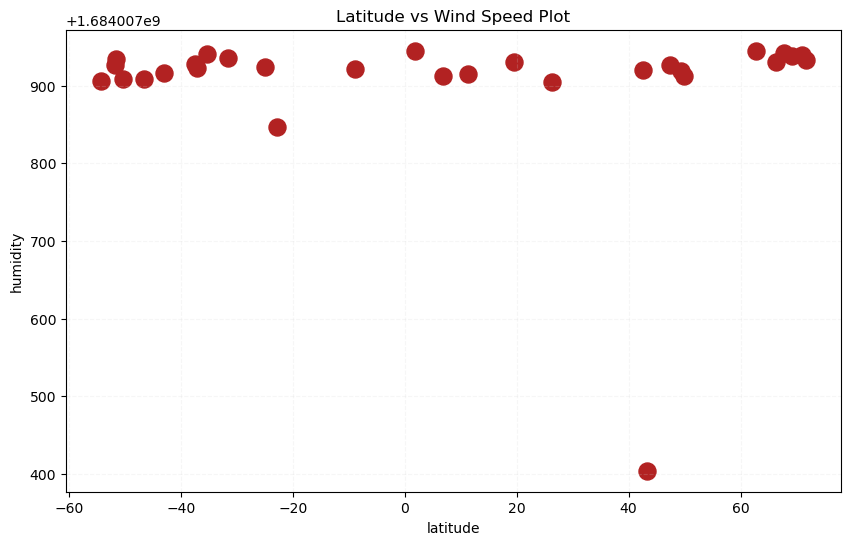

In [33]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.figure(figsize=(10,6))

plt.scatter(df2.latitude, df2.wind_speed, color="firebrick", s=150)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Wind Speed Plot")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df2.loc[df2.latitude >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,Unnamed: 0,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,0,Anshun,CN,26.254911,105.943777,58.73,1014,78,1684007905,100,1684007905
1,5,Vysoké Mýto,CZ,49.953473,16.161645,52.20,1021,86,1684007912,84,1684007912
2,6,City of Georgetown,GY,6.813743,-58.162447,85.98,1011,70,1684007913,75,1684007913
3,7,Enewetak,MH,11.340891,162.324549,82.33,1012,73,1684007915,97,1684007915
4,9,Kapuskasing,CA,49.416667,-82.433333,57.20,1031,18,1684007919,20,1684007919


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df2.loc[df2.latitude < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,Unnamed: 0,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,1,Grytviken,GS,-54.280648,-36.509800,31.91,1005,84,1684007906,100,1684007906
1,2,El Calafate,AR,-50.338871,-72.272084,41.36,999,80,1684007908,13,1684007908
2,3,Papatowai,NZ,-46.561868,169.470842,45.63,1020,92,1684007909,99,1684007909
3,4,Rio de Janeiro,BR,-22.911014,-43.209373,71.55,1017,70,1684007847,40,1684007847
4,8,Blackmans Bay,AU,-43.004684,147.317986,39.74,1024,93,1684007916,48,1684007916


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8302789147736896


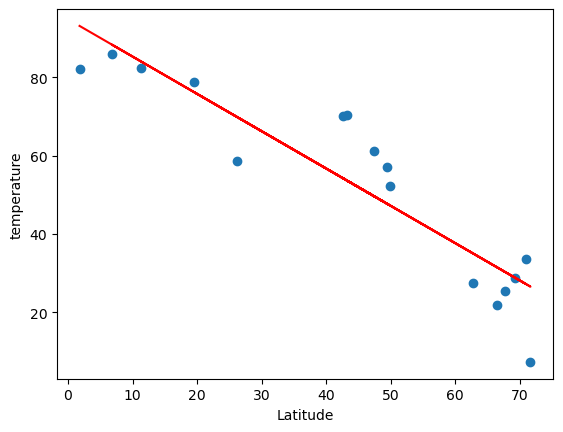

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

The r-value is: 0.7524201630986209


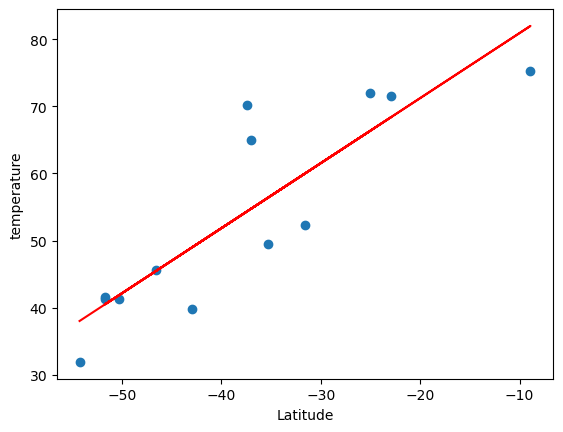

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

**Discussion about the linear relationship: Looking at the linear regressions between the Northern and Southern Hemisphere the residuals on the Northern Hemisphere are more accurate unlike the Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.058526818259824503


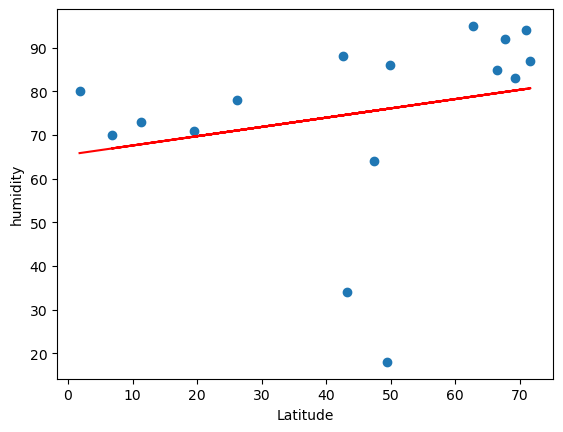

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "humidity",(6,-10))

The r-value is: 0.03723682519070555


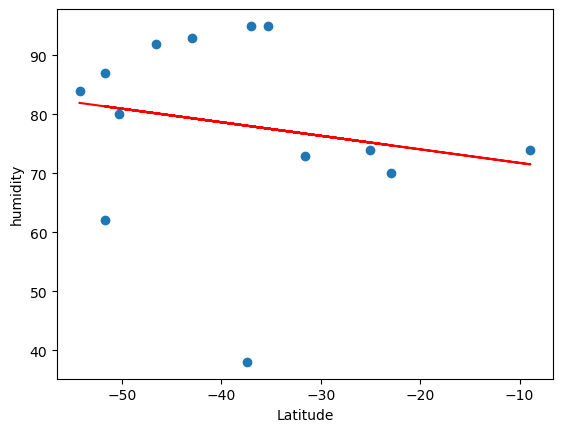

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "humidity",(6,-10))

**Discussion about the linear relationship: The residuals between both hemispheres look about the same, one doesn't seem like it's more accurate than the other

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00595552860163975


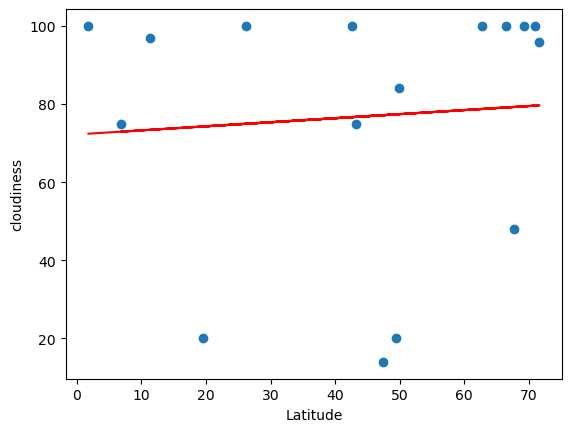

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "cloudiness",(6,-10))

The r-value is: 0.0032588161659839964


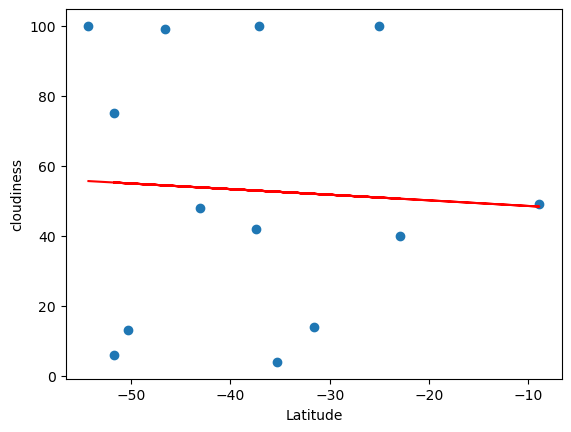

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "cloudiness",(6,-10))

**Discussion about the linear relationship: The relationship between either hemishperes doesn't seem to have a story with latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0025181842521611224


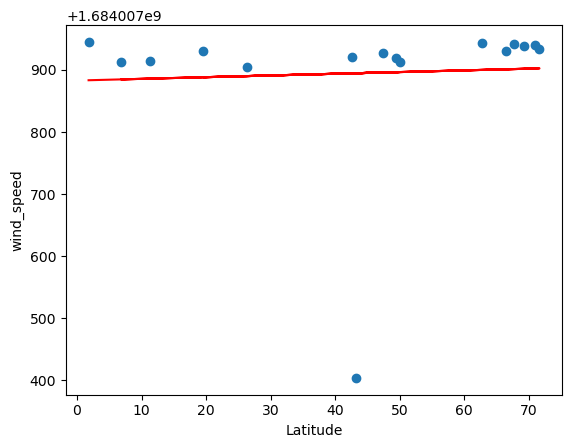

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "wind_speed",(6,-10))

The r-value is: 0.026408225427526955


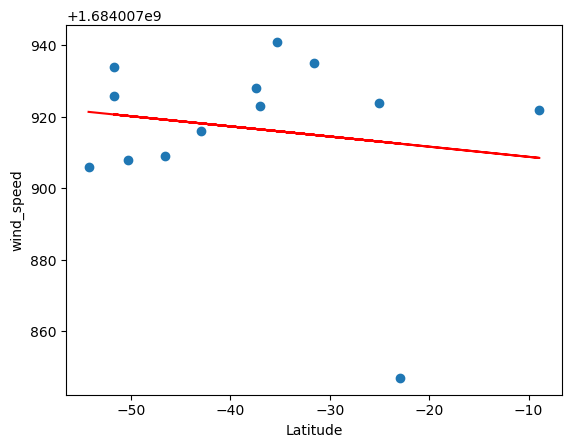

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "wind_speed",(6,-10))

**Discussion about the linear relationship:These linear regression shows great relationship with latitude and wind speed, this one shows that Northern hemisphere has a better residual than the southern hemisphere 